In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
'''https://stackoverflow.com/questions/34091877/how-to-add-header-row-to-a-pandas-dataframe  , i refered this link for adding header syntax'''

haberman = pd.read_csv("C:/Users/Snehal/Downloads/ipythonNotebooks/haberman.csv",sep=',', names = ["Age", "YearOfOperation", "positive_AxillaryNodes", "Status"])





In [4]:
print (haberman.shape)

(306, 4)


In [5]:
print(haberman.columns)

Index(['Age', 'YearOfOperation', 'positive_AxillaryNodes', 'Status'], dtype='object')


In [6]:
haberman["Status"].value_counts()

1    225
2     81
Name: Status, dtype: int64

High Level statistics of the Haberman's Dataset:

-> Number Point: 306 (total no. of observations)
-> number of features: 3 (total 4 columns are present, out of them 3 are features and one is class)
   Age, YearOfOperation, positive_AxillaryNodes
-> number of class: 1 (Staus)
-> Data points for each class are follows:
    1 - 225 (patient survived more than 5 years)
    2 - 81 (patient died within 5 years)
   here 225 patient who survived more than 5 years and 81 dided withimh 5 years. 225/306 = 74% patient survied. and 81 dided within 5 years. so this is kind of imbalance dataset

-> Here objective is to analyse the dataset in such manner that we can find out the comman pattern.
-> so here in this case we have [Age, year of operation, positive axillary nodes in body] for each patient who has undergone      breast cancer.we also have status showing whether patient survied more than 5 year or died withing 5 years)
-> So basically we have to find out comman behaviour based on Haberman dataset
   for example: at what comman age survival chances are high or low
                does year in which patient operated impacted survial rate
                no. of positive auxilary nodes afecting chances of survival.
                

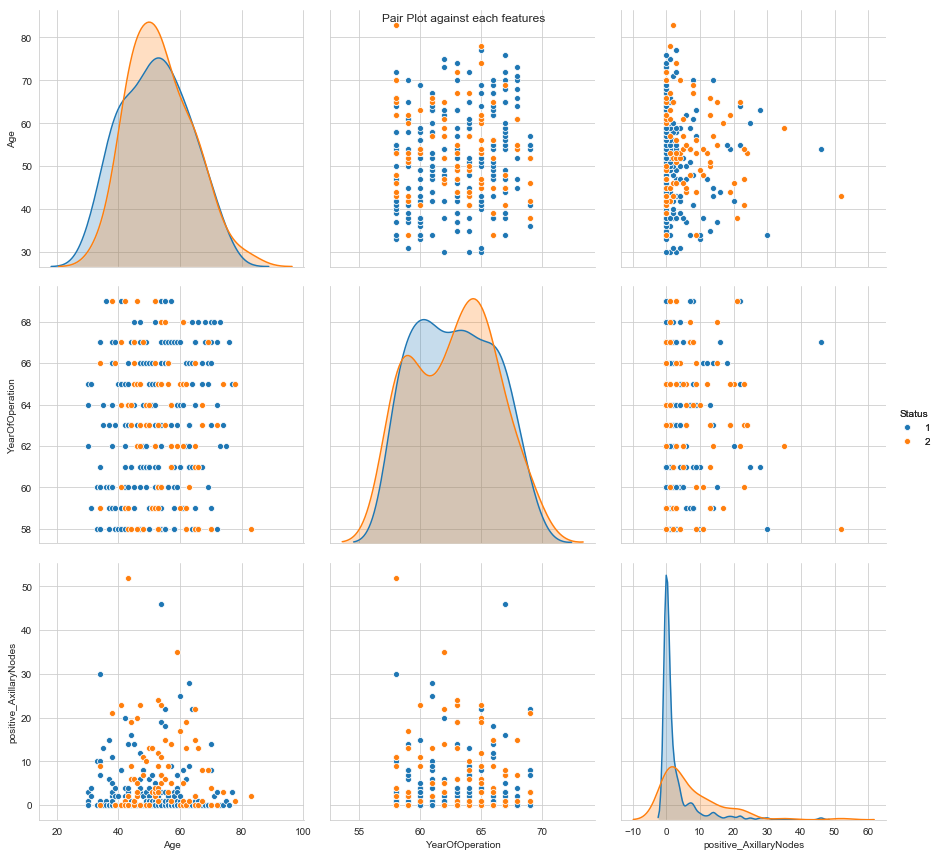

In [7]:
#Pair plot for Age,YearOfOperation, positive_AxillaryNodes

plt.close();

sns.set_style("whitegrid");

sns.pairplot(haberman, hue="Status", vars=["Age", "YearOfOperation", "positive_AxillaryNodes"], height=4).add_legend();
plt.suptitle('Pair Plot against each features')

#when i tried plotting without 'vars' it was including status also in the combinations
plt.show()



-> points within plot (auxillary_nodes vs Age ) are badly overlapping with each other.hence this plot wont be much helpful in      the classification)
-> As u can see in the plots which contains Year of operation as one of the axis (auxillary_nodes vs Age and year_of_operation vs age) that year is not much dependent factor here. as all status points are distributed over almost all years.
-> so here plot of positiveAuxilarynodes vs age is slighly better than others but still not giving clear idea about classification of status



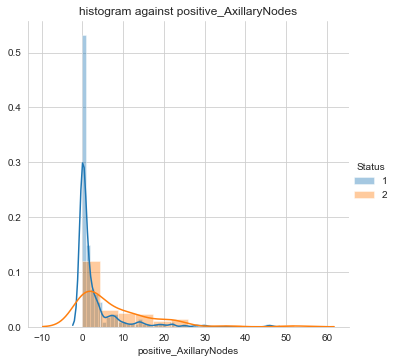

In [34]:
#Histogram against positive_AxillaryNodes

sns.FacetGrid(haberman, hue="Status", height=5) \
   .map(sns.distplot, "positive_AxillaryNodes") \
   .add_legend();
plt.title("histogram against positive_AxillaryNodes")
plt.show();

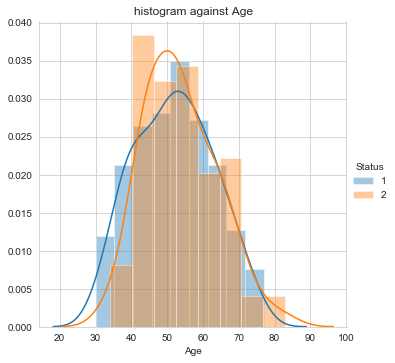

In [39]:
#Histogram against Age

sns.FacetGrid(haberman, hue="Status", height=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.title("histogram against Age")
plt.show();

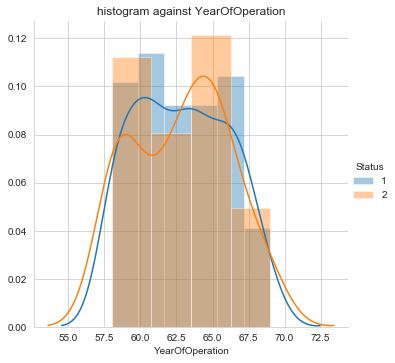

In [40]:
#Histogram against YearOfOperation


sns.FacetGrid(haberman, hue="Status", height=5) \
   .map(sns.distplot, "YearOfOperation") \
   .add_legend();
plt.title("histogram against YearOfOperation")
plt.show();

observations from Histograms and CDF that:
1 histograms for Age and Year of operation showing massive overlap.
2. looking at positive_auxilaryNode histogram, we can say that auxillary node dont have value more than 30
3. looking at histogram of positive_auxilaryNode, we can observe that surving chances are more when less auxillary nodes
As age, yearOfOperation not showing much significance here so 'no.ofpositiveauxillarynodes' will be the good feature to take into consideration for classification

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


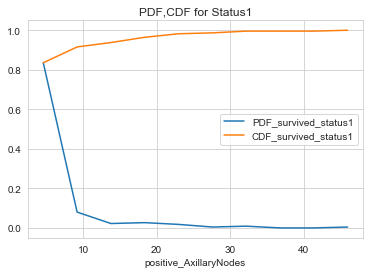

In [41]:
#PDF and CDF for status1

status_1 = haberman.loc[haberman["Status"] == 1];

counts, bin_edges = np.histogram(status_1['positive_AxillaryNodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);

plt.plot(bin_edges[1:], cdf);






plt.legend('status1')
plt.legend(['PDF_survived_status1', 'CDF_survived_status1'])
plt.title("PDF,CDF for Status1")
plt.xlabel("positive_AxillaryNodes")


plt.show();


as we can see here approx 90% (CDF-0.9) of the patient who survived(with status1) have auxilary nodes between 0 to 10

PDF is [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
CDF is: [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


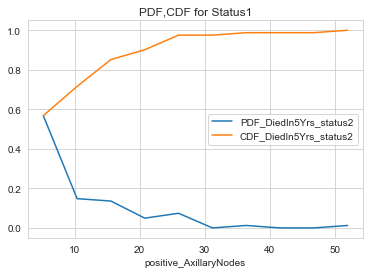

In [42]:
#PDF and CDF for status2

status_2 = haberman.loc[haberman["Status"] == 2];

counts, bin_edges = np.histogram(status_2['positive_AxillaryNodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("PDF is", pdf)

plt.plot(bin_edges[1:],pdf);

print("bin Edges:", bin_edges);
cdf = np.cumsum(pdf)
print("CDF is:", cdf)

plt.plot(bin_edges[1:], cdf)





plt.legend('status1')
plt.legend(['PDF_DiedIn5Yrs_status2', 'CDF_DiedIn5Yrs_status2'])
plt.title("PDF,CDF for Status1")
plt.xlabel("positive_AxillaryNodes")

plt.show();


observe auxilary nodes between 0-20, approx 90%(cdf-0.9) of the patient having numberOfNodes 20 has survival rate low.
(i.e status2 - died within 5 years)
it can be fair enough to conclude that more auxilary nodes reduces chances of survival

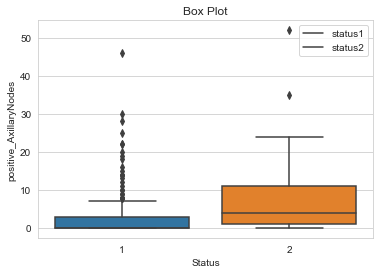

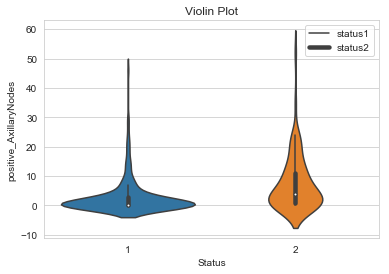

In [43]:
#plt.subplot(111)
sns.boxplot(x='Status',y='positive_AxillaryNodes', data=haberman)
plt.legend('Boxstatus')
plt.legend(['status1', 'status2'])
plt.title("Box Plot")
plt.show()

#plt.subplot(212)
sns.violinplot(x='Status',y='positive_AxillaryNodes', data=haberman)

plt.legend('Violinstatus')
plt.legend(['status1', 'status2'])
plt.title("Violin Plot")
plt.show()


more than 75 percentile of status1(blue in color) lies inside 0 to 5 auxilary nodes.
Hence survival chances of patient are more when auxilary node below 5
but there are 25 percintile of status2(orange in color) lies below 5 auxilaryNodes 
hence it can be said that 25 percentile of patient died even if they were having below 5 auxilary nodes


Overall Obesrvation : 
Year and Age dont have much impact on survival of patient

As dataset contains 225 patient who survived more than 5 years and patient not survived are only 81.
Hence we cant conclude exactly as we dont have equal no of dataset for each status

Conclusion:
By observing all the plot (CDF,PDF,PairPlot, Box,Violon plot it will be quite fair to conclude that:
survival chances are more if patient have less positive auxilary nodes.
(but this is not 100% true in each cases, because patient with positive auxilary node below 5 have also died within 5 years)